In [213]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [214]:
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.family']

['AppleGothic']

# 데이터 가져오기

시트구성: 동별매출지수, 카테고리별 매출비중, 종합테이블

매출지수 = 기준일 매출을 ‘100’이라고 할 때 특정 시점의 상대적 매출을 표시하는 지수. ‘100’이 넘으면 더 많이 팔렸다는 의미. (기준일: 2019.04.11, 서울 중구 신당5동)





In [58]:
retail_data_dong = pd.read_excel('/Users/jihyejung/수업/3/빅데이터/프로젝트 준비/2020빅콘테스트 문제데이터(혁신아이디어분야)/04_유통데이터(GS리테일)/04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx'
                           ,sheet_name = '동별매출지수'
                           ,header = 3)

In [122]:
retail_data_total = pd.read_excel('/Users/jihyejung/수업/3/빅데이터/프로젝트 준비/2020빅콘테스트 문제데이터(혁신아이디어분야)/04_유통데이터(GS리테일)/04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx'
                           ,sheet_name = '종합테이블(TB_DD_STR_PURCH_CLS)'
                           ,header = 0)

In [123]:
retail_data_total.OPER_DT = pd.to_datetime(retail_data_total.OPER_DT,format='%Y%m%d')
retail_data_total['AMT_IND'] = retail_data_total['AMT_IND']*100

In [124]:
retail_data_total

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,2019-02-01,대구광역시,수성구,고산1동,106.433557,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637
1,2019-02-01,대구광역시,수성구,고산2동,107.641799,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913
2,2019-02-01,대구광역시,수성구,고산3동,85.607140,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697
3,2019-02-01,대구광역시,수성구,두산동,72.486779,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000
4,2019-02-01,대구광역시,수성구,만촌1동,115.572808,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14455,2020-05-31,서울특별시,중구,중림동,159.503787,0.314217,0.221087,0.344307,0.026204,0.070094,0.006347,0.013541,0.004203
14456,2020-05-31,서울특별시,중구,청구동,138.918413,0.276333,0.221216,0.363681,0.053907,0.076963,0.001592,0.000353,0.005955
14457,2020-05-31,서울특별시,중구,필동,71.426489,0.303338,0.187615,0.370371,0.038908,0.079408,0.007826,0.008298,0.004236
14458,2020-05-31,서울특별시,중구,황학동,113.418966,0.264708,0.257387,0.367001,0.029140,0.070770,0.001060,0.003646,0.006287


In [511]:
#연도별로 나누기
total_19 = retail_data_total[retail_data_total.OPER_DT.dt.year==2019]
total_20 = retail_data_total[retail_data_total.OPER_DT.dt.year==2020]

#길이가 다름, 2020년에는 2월 29일이 있어서
len(total_19),len(total_20)

(7200, 7260)

### 시간에 따른 매출지수 변화 (구 별)

- 19년도에 매출지수가 대체로 높은 것으로 보아 19년도에 20년도 보다 잘팔린 것을 알 수 있다
- 19년에는 노원구와 중구간에 매출지수 차이가 컸지만 20년도에는 차이가 줄어들고 둘이 거의 비슷함 (대구도 비슷함), 유동인구가 줄은것과 관련이 있을 것으로 예상->사는 품목에 변화가 있는지 알아보면 좋을 듯
- 대구의 경우 19년도 주말에 매출이 늘어나는 형태였지만 20년도에는 주말에 매출이 줄어드는 형태 

- 코로나19 감염이 심각해짐에 따라 매출이 줄어들었다가 점차 완화되면서 매출이 증가하는 것을 보임

- 갑자기 증가한 날짜는 화이트데이와 발렌타인데이


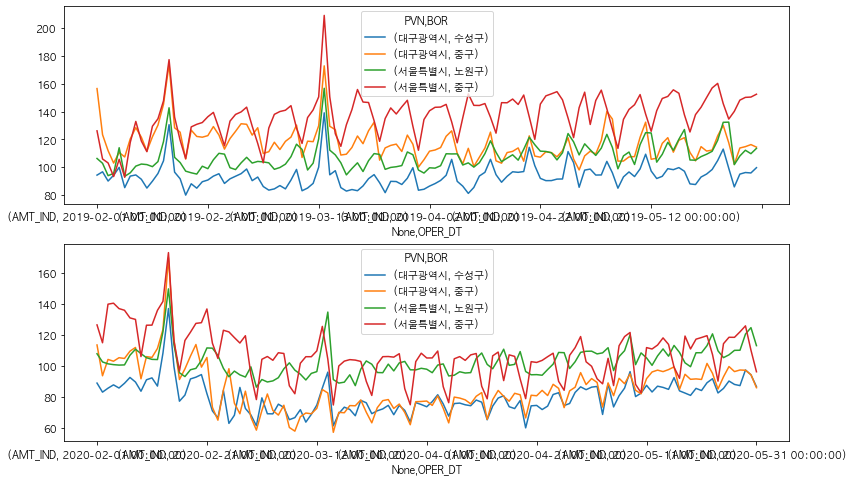

In [590]:
#일 별
df_AMT_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['AMT_IND']].mean()
df_AMT_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['AMT_IND']].mean()

fig, axes = plt.subplots(2,1,figsize=(13,8))
df_AMT_19.unstack(0).transpose().plot(ax = axes[0])
df_AMT_20.unstack(0).transpose().plot(ax = axes[1])

In [546]:
# 갑자기 튀어나온 날 날짜
# 3/14일, 2/14일 화이트데이, 발렌타인 데이->간식거리가 매출 증가했는지 확인
# 전년도에 비해 3/14일 판매강세 줄어들음
df_AMT_19.unstack(0).transpose().idxmax(),\ 
df_AMT_20.unstack(0).transpose().idxmax()

(PVN    BOR
 대구광역시  수성구    (AMT_IND, 2019-03-14 00:00:00)
        중구     (AMT_IND, 2019-02-14 00:00:00)
 서울특별시  노원구    (AMT_IND, 2019-03-14 00:00:00)
        중구     (AMT_IND, 2019-03-14 00:00:00)
 dtype: object,
 PVN    BOR
 대구광역시  수성구    (AMT_IND, 2020-02-14 00:00:00)
        중구     (AMT_IND, 2020-02-14 00:00:00)
 서울특별시  노원구    (AMT_IND, 2020-02-14 00:00:00)
        중구     (AMT_IND, 2020-02-14 00:00:00)
 dtype: object)

In [581]:
#간식거리의 매출비중(LCLS_20_P)이 평소보다 늘은 것을 알 수 있다.
df_19_valentine = pd.DataFrame(total_19[total_19.OPER_DT == '2019-02-14'].mean(), columns = ['2019'])
df_20_valentine = pd.DataFrame(total_20[total_20.OPER_DT == '2020-02-14'].mean(), columns = ['2020'])
pd.concat([total_19.mean(), df_19_valentine, df_20_valentine], axis = 1)

,0,2019,2020
AMT_IND,111.598275,150.948784,153.462061
LCLS_10_P,0.325269,0.258614,0.229181
LCLS_20_P,0.215483,0.427031,0.436882
LCLS_30_P,0.358888,0.243884,0.251556
LCLS_40_P,0.026405,0.021858,0.021502
LCLS_50_P,0.053815,0.034397,0.046735
LCLS_60_P,0.006246,0.003831,0.003053
LCLS_70_P,0.009365,0.006960,0.006942
LCLS_80_P,0.004530,0.003426,0.004149


### 시간에 따른 매출비중 변화 (업종 별)
- 작년과 추이를 비교해보면 헬스&뷰티(50), 사회활동(70), 임신/육아(80)의 매출이 다르다
- 헬스&뷰티(50)의 경우 2020년 줄어들음, 초반에만 많은데 마스크로 볼 수 있다
- 사회활동(70)의 경우 2020년 가장 많이 줄어들음.
- 임신/육아(80)의 경우 서울의 변동폭이 커졌다.

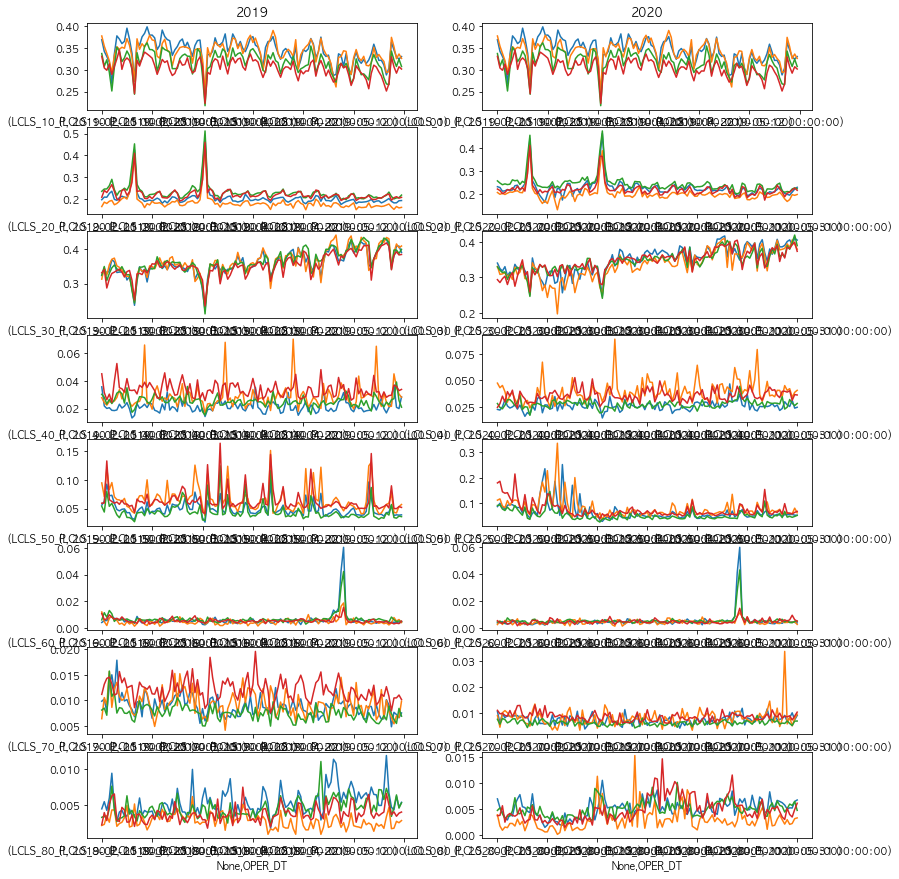

In [598]:
#2019
df_10_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_10_P']].mean()
df_20_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_20_P']].mean()
df_30_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_30_P']].mean()
df_40_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_40_P']].mean()
df_50_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_50_P']].mean()
df_60_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_60_P']].mean()
df_70_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_70_P']].mean()
df_80_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_80_P']].mean()

fig, axes = plt.subplots(8,2,figsize=(13,15))
df_10_19.unstack(0).transpose().plot(ax = axes[0,0], legend = False, title = '2019')
df_20_19.unstack(0).transpose().plot(ax = axes[1,0], legend = False)
df_30_19.unstack(0).transpose().plot(ax = axes[2,0], legend = False)
df_40_19.unstack(0).transpose().plot(ax = axes[3,0], legend = False)
df_50_19.unstack(0).transpose().plot(ax = axes[4,0], legend = False)
df_60_19.unstack(0).transpose().plot(ax = axes[5,0], legend = False)
df_70_19.unstack(0).transpose().plot(ax = axes[6,0], legend = False)
df_80_19.unstack(0).transpose().plot(ax = axes[7,0], legend = False)

#2020
df_10_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_10_P']].mean()
df_20_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_20_P']].mean()
df_30_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_30_P']].mean()
df_40_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_40_P']].mean()
df_50_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_50_P']].mean()
df_60_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_60_P']].mean()
df_70_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_70_P']].mean()
df_80_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_80_P']].mean()

df_10_19.unstack(0).transpose().plot(ax = axes[0,1], legend = False, title = '2020')
df_20_20.unstack(0).transpose().plot(ax = axes[1,1], legend = False)
df_30_20.unstack(0).transpose().plot(ax = axes[2,1], legend = False)
df_40_20.unstack(0).transpose().plot(ax = axes[3,1], legend = False)
df_50_20.unstack(0).transpose().plot(ax = axes[4,1], legend = False)
df_60_20.unstack(0).transpose().plot(ax = axes[5,1], legend = False)
df_70_20.unstack(0).transpose().plot(ax = axes[6,1], legend = False)
df_80_20.unstack(0).transpose().plot(ax = axes[7,1], legend = False)

### 100이상의 경우 업종 분포

In [266]:
col_list = retail_data_total.columns
col_list

Index(['OPER_DT', 'PVN', 'BOR', 'ADMD', 'AMT_IND', 'LCLS_10_P', 'LCLS_20_P',
       'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P',
       'LCLS_80_P'],
      dtype='object')

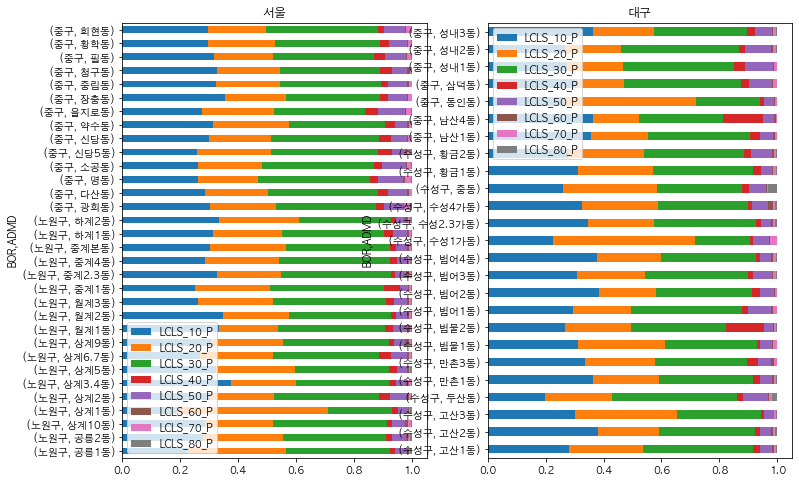

In [420]:
#2019 매출 좋은 곳
total_19_up100 = total_19[total_19.AMT_IND>=100]
df = total_19_up100.groupby(['PVN','BOR','ADMD'])[col_list[5:]].mean()
fig, axes = plt.subplots(1,2,figsize=(12,8))

df.loc['서울특별시'].plot(kind = 'barh',stacked = True, ax = axes[0], title = '서울')
df.loc['대구광역시'].plot(kind = 'barh',stacked = True, ax = axes[1], title = '대구')

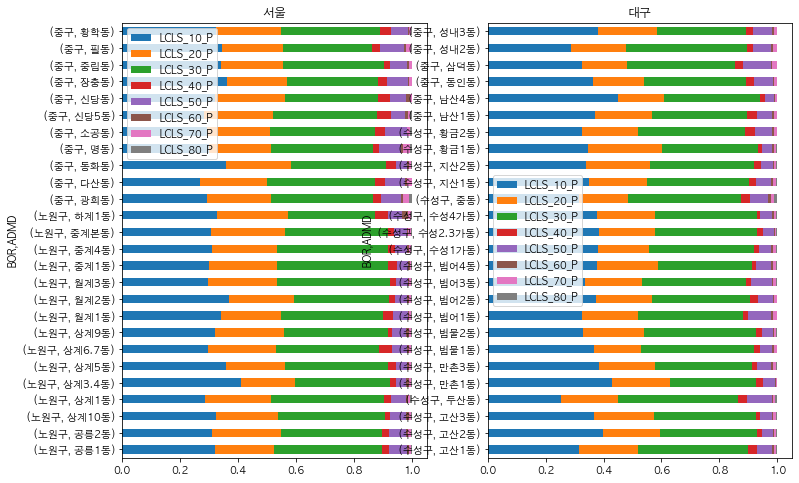

In [320]:
#2019 매출 안좋은 곳
total_19_down100 = total_19[total_19.AMT_IND<100]
df = total_19_down100.groupby(['PVN','BOR','ADMD'])[col_list[5:]].mean()
fig, axes = plt.subplots(1,2,figsize=(12,8))
df.loc['서울특별시'].plot(kind = 'barh',stacked = True, ax = axes[0], title = '서울')
df.loc['대구광역시'].plot(kind = 'barh',stacked = True, ax = axes[1], title = '대구')

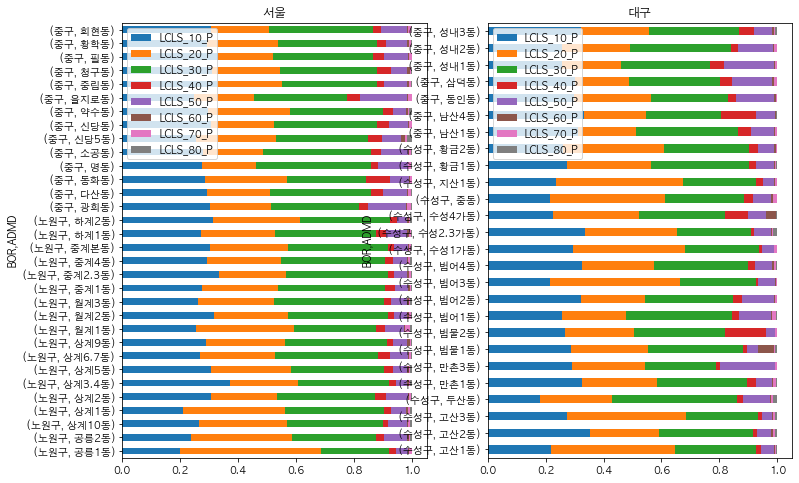

In [321]:
#2020 매출 좋은 곳
total_20_up100 = total_20[total_20.AMT_IND>=100]
df = total_20_up100.groupby(['PVN','BOR','ADMD'])[col_list[5:]].mean()
fig, axes = plt.subplots(1,2,figsize=(12,8))

df.loc['서울특별시'].plot(kind = 'barh',stacked = True, ax = axes[0], title = '서울')
df.loc['대구광역시'].plot(kind = 'barh',stacked = True, ax = axes[1], title = '대구')

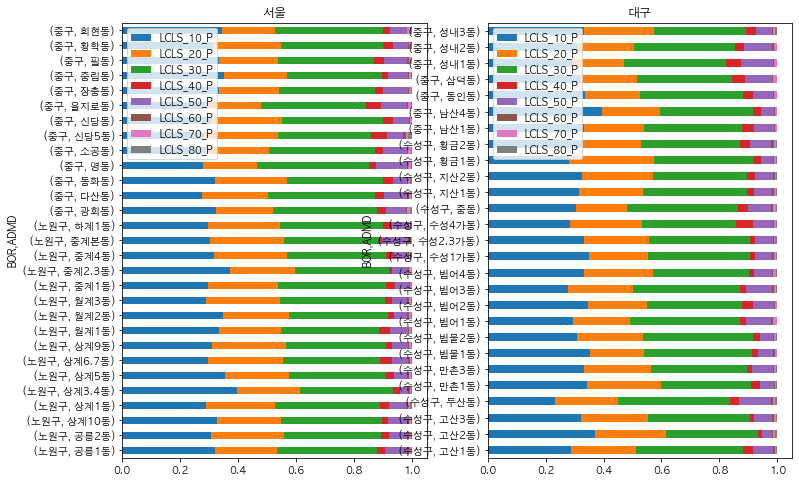

In [322]:
#2020 매출 안좋은 곳
total_20_down100 = total_20[total_20.AMT_IND<100]
df = total_20_down100.groupby(['PVN','BOR','ADMD'])[col_list[5:]].mean()
fig, axes = plt.subplots(1,2,figsize=(12,8))

df.loc['서울특별시'].plot(kind = 'barh',stacked = True, ax = axes[0], title = '서울')
df.loc['대구광역시'].plot(kind = 'barh',stacked = True, ax = axes[1], title = '대구')

In [599]:
print('높은 매출 유지동:',len(set(total_20_up100.ADMD).intersection(set(total_19_up100.ADMD)))
     ,'높은 매출로 오른동:', len(set(total_20_up100.ADMD).difference(set(total_19_up100.ADMD))))
print('낮은 매출 유지동:',len(set(total_20_down100.ADMD).intersection(set(total_19_down100.ADMD)))
     ,'낮은 매출로 내린동:', len(set(total_20_down100.ADMD).difference(set(total_19_down100.ADMD))))

높은 매출 유지동: 56 높은 매출로 오른동: 2
낮은 매출 유지동: 52 낮은 매출로 내린동: 4


In [ ]:
a = []
for i in range(7140):
    old = retail_data_total.AMT_IND[i]
    new = retail_data_total.AMT_IND[i+7200]
    a.append((old-new)/old)
a